In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
treino = pd.read_csv("1. Dataset/train.csv")
treino.head(4)

,PRODUCT_ID,DEVICE_TYPE,MIDIA_TYPE,DEPARTMENT,SUBDEPARTMENT,REGION,SUBA,PRODUCT_BRAND,VISITS,PRICE,PRICE_VARIATION,DISCOUNT_RATE,STOCK,FREIGHT_VALUE,DELIVARY_TIME,REVIEW,QTD_REVIEW,LENGTH,WIDTH,IS_A_KIT,SALE_CLASSIFICATION,PURCHASES
0,4232571872873909134,Mobile,Free,JxkKbrSoP3ivEKRwuIXJy9+EAG1Ggeh8HXI2UMBzn00=,HzsE0Or8uQTtp69IZy8PvKchotrkGOvNzJ1yxZEWbSw=,zFie/e4sLhGx7L2VcG4gLB7nJBz5ov3ZnlOXt0CqVnU=,NO,n4bQgYhMfWWaL+qgxVrQFaO/TxsrC4Is0V1sFbDwCgg=,22,485.27,-0.0313,0.0,11,"(91, 100]",11 to 15 days,5.00,1,0.205,0.175,False,A,0
1,6206194185295078002,Mobile,Free,ik/QyMIbDByXqw1q7Hs2irwtykafQbRsItSBitXepg4=,HzsE0Or8uQTtp69IZy8PvKchotrkGOvNzJ1yxZEWbSw=,8Yy10akfnP0lnF5Ra/Sz6TYqkh7gZuGdqCbcgb5Idpo=,NO,NaN,226,37.85,-0.0656,0.0,1,"(91, 100]",6 to 10 days,3.75,4,0.281,0.247,False,C,1
2,9063231592291586481,Mobile,Free,RzD9VtJGed49KrJwCopqKa9+xAi0fs0g/00+Dr5Yb7I=,ksUvTnVR3HzXil73h5A5kgvCYS+U1QD4M8yTvwP5fs4=,8Yy10akfnP0lnF5Ra/Sz6TYqkh7gZuGdqCbcgb5Idpo=,NO,n4bQgYhMfWWaL+qgxVrQFaO/TxsrC4Is0V1sFbDwCgg=,35,174.71,-0.0918,0.0,1,"(41, 50]",16 to 20 days,5.00,1,0.155,0.175,False,A,0
3,4730414522291689275,Mobile,Free,ik/QyMIbDByXqw1q7Hs2irwtykafQbRsItSBitXepg4=,+k7t4f27O2LWxWSqer0kW0meAi2CmHWZ3P0K2YoN+KY=,zFie/e4sLhGx7L2VcG4gLB7nJBz5ov3ZnlOXt0CqVnU=,NO,n4bQgYhMfWWaL+qgxVrQFaO/TxsrC4Is0V1sFbDwCgg=,3,30.59,0.0766,0.0,201,"(91, 100]",1 to 5 days,4.67,5,0.175,0.175,False,A,0


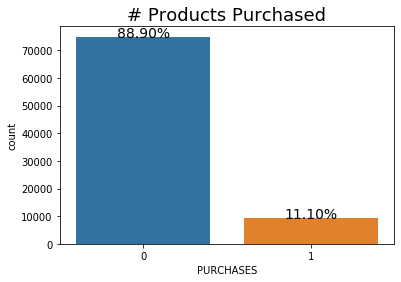

In [6]:
total = len(treino)
g = sns.countplot(x='PURCHASES', data=treino)
g.set_title("# Products Purchased", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

### Porcentage of missing values by variable

In [7]:
treino.isna().mean().sort_values()*100

PRODUCT_ID              0.000000
IS_A_KIT                0.000000
QTD_REVIEW              0.000000
REVIEW                  0.000000
STOCK                   0.000000
DISCOUNT_RATE           0.000000
SALE_CLASSIFICATION     0.000000
PRICE                   0.000000
PRICE_VARIATION         0.000000
SUBA                    0.000000
REGION                  0.000000
VISITS                  0.000000
PURCHASES               0.000000
LENGTH                  0.055757
WIDTH                   0.055757
DEVICE_TYPE             2.938490
FREIGHT_VALUE           3.544694
DELIVARY_TIME           3.631295
DEPARTMENT              5.810546
MIDIA_TYPE             11.336378
SUBDEPARTMENT          13.888131
PRODUCT_BRAND          18.377128
dtype: float64

In [8]:
serie_missing = treino.isna().mean()
cols_sem_missing = serie_missing[serie_missing == 0].index
treino_sem_missing = treino[cols_sem_missing]
treino_sem_missing.head(4)

,PRODUCT_ID,REGION,SUBA,VISITS,PRICE,PRICE_VARIATION,DISCOUNT_RATE,STOCK,REVIEW,QTD_REVIEW,IS_A_KIT,SALE_CLASSIFICATION,PURCHASES
0,4232571872873909134,zFie/e4sLhGx7L2VcG4gLB7nJBz5ov3ZnlOXt0CqVnU=,NO,22,485.27,-0.0313,0.0,11,5.00,1,False,A,0
1,6206194185295078002,8Yy10akfnP0lnF5Ra/Sz6TYqkh7gZuGdqCbcgb5Idpo=,NO,226,37.85,-0.0656,0.0,1,3.75,4,False,C,1
2,9063231592291586481,8Yy10akfnP0lnF5Ra/Sz6TYqkh7gZuGdqCbcgb5Idpo=,NO,35,174.71,-0.0918,0.0,1,5.00,1,False,A,0
3,4730414522291689275,zFie/e4sLhGx7L2VcG4gLB7nJBz5ov3ZnlOXt0CqVnU=,NO,3,30.59,0.0766,0.0,201,4.67,5,False,A,0


### Drop some variables 

In [9]:
pd.set_option('display.max_rows', None) 
treino_sem_missing["PRODUCT_ID"].value_counts().value_counts() # There no predictive power
treino_sem_missing["REGION"].value_counts(normalize=True) # High cardinality
treino_sem_missing["SUBA"].value_counts(normalize=True) # keep the variable
treino_sem_missing["IS_A_KIT"].value_counts(normalize=True) # There no predictive power
treino_sem_missing["SALE_CLASSIFICATION"].value_counts(normalize=True) # keep the variable

treino_sem_missing2 = treino_sem_missing.copy()
treino_sem_missing2 = treino_sem_missing2.drop(["PRODUCT_ID", "REGION", "IS_A_KIT"], axis = 1)
treino_sem_missing2.head(4)

,SUBA,VISITS,PRICE,PRICE_VARIATION,DISCOUNT_RATE,STOCK,REVIEW,QTD_REVIEW,SALE_CLASSIFICATION,PURCHASES
0,NO,22,485.27,-0.0313,0.0,11,5.00,1,A,0
1,NO,226,37.85,-0.0656,0.0,1,3.75,4,C,1
2,NO,35,174.71,-0.0918,0.0,1,5.00,1,A,0
3,NO,3,30.59,0.0766,0.0,201,4.67,5,A,0


In [10]:
treino_sem_missing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84295 entries, 0 to 84294
Data columns (total 10 columns):
SUBA                   84295 non-null object
VISITS                 84295 non-null int64
PRICE                  84295 non-null float64
PRICE_VARIATION        84295 non-null float64
DISCOUNT_RATE          84295 non-null float64
STOCK                  84295 non-null int64
REVIEW                 84295 non-null float64
QTD_REVIEW             84295 non-null int64
SALE_CLASSIFICATION    84295 non-null object
PURCHASES              84295 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.4+ MB


### Transformations variables required for running machine learning models: One Hot Encoder

In [11]:
from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols = ["SUBA", "SALE_CLASSIFICATION"], use_cat_names = True, drop_invariant=True)
enc.fit(treino_sem_missing2)

OneHotEncoder(cols=['SUBA', 'SALE_CLASSIFICATION'], drop_invariant=True,
              handle_missing='value', handle_unknown='value', return_df=True,
              use_cat_names=True, verbose=0)

In [12]:
treino_ohe = enc.transform(treino_sem_missing2)
treino_ohe.head(4)

,SUBA_NO,SUBA_YES,VISITS,PRICE,PRICE_VARIATION,DISCOUNT_RATE,STOCK,REVIEW,QTD_REVIEW,SALE_CLASSIFICATION_A,SALE_CLASSIFICATION_C,PURCHASES
0,1,0,22,485.27,-0.0313,0.0,11,5.00,1,1,0,0
1,1,0,226,37.85,-0.0656,0.0,1,3.75,4,0,1,1
2,1,0,35,174.71,-0.0918,0.0,1,5.00,1,1,0,0
3,1,0,3,30.59,0.0766,0.0,201,4.67,5,1,0,0


### Split dataset into two distinct part. Later will be evaluated only in the second part which is not used to train the model.

In [13]:
from sklearn.model_selection import train_test_split

X = treino_ohe.drop(["PURCHASES"], axis = 1)
y = treino_ohe["PURCHASES"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state = 1234)


X_train.shape, X_test.shape

((67436, 11), (16859, 11))

### Run first model: LightGBM

In [16]:
import lightgbm as lgbm
dtrain = lgbm.Dataset(X_train, y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, dtrain, 100)